# Gerardo Sandoval
# HW 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt

# Problem 1

In [61]:
p1_data = pd.read_csv('adult-modified.csv')

a general description of the data:

In [62]:
p1_data.describe()

,age,education,hours-per-week
count,9412.000000,9412.000000,9412.000000
mean,38.357310,10.125266,41.080217
std,12.962135,2.542118,11.884590
min,17.000000,1.000000,1.000000
25%,28.000000,9.000000,40.000000
50%,37.000000,10.000000,40.000000
75%,47.000000,13.000000,45.000000
max,90.000000,16.000000,99.000000


In [65]:
p1_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9412 entries, 0 to 9411
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             9412 non-null   int64 
 1   workclass       9412 non-null   object
 2   education       9412 non-null   int64 
 3   marital-status  9412 non-null   object
 4   race            9412 non-null   object
 5   sex             9412 non-null   object
 6   hours-per-week  9412 non-null   int64 
 7   income          9412 non-null   object
dtypes: int64(3), object(5)
memory usage: 588.4+ KB


In [66]:
p1_data.describe(include=['object'])

,workclass,marital-status,race,sex,income
count,9412,9412,9412,9412,9412
unique,3,2,5,2,2
top,Private,Married,White,Male,<=50K
freq,6947,4737,8062,6383,7093


In [67]:
p1_data.describe(include=['int64', 'float'])

,age,education,hours-per-week
count,9412.000000,9412.000000,9412.000000
mean,38.357310,10.125266,41.080217
std,12.962135,2.542118,11.884590
min,17.000000,1.000000,1.000000
25%,28.000000,9.000000,40.000000
50%,37.000000,10.000000,40.000000
75%,47.000000,13.000000,45.000000
max,90.000000,16.000000,99.000000


In [68]:
p1_data.isna().sum()

age               0
workclass         0
education         0
marital-status    0
race              0
sex               0
hours-per-week    0
income            0
dtype: int64

## Problem 2

### Box Plots

<AxesSubplot:>

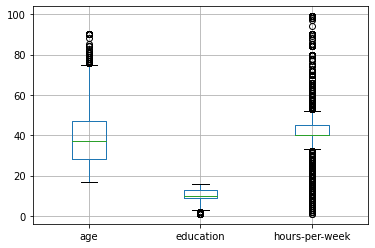

In [69]:
p1_data.boxplot()

<AxesSubplot:>

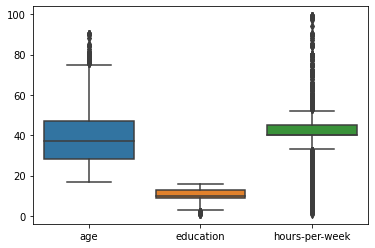

In [70]:
sea.boxplot(data=p1_data)

## Histogram

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'education'}>],
       [<AxesSubplot:title={'center':'hours-per-week'}>, <AxesSubplot:>]],
      dtype=object)

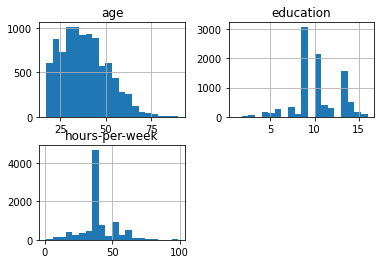

In [71]:
p1_data.hist(bins=20)

<AxesSubplot:ylabel='Count'>

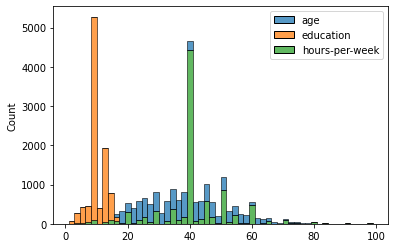

In [72]:
sea.histplot(data=p1_data, multiple='stack')

<AxesSubplot:xlabel='age', ylabel='hours-per-week'>

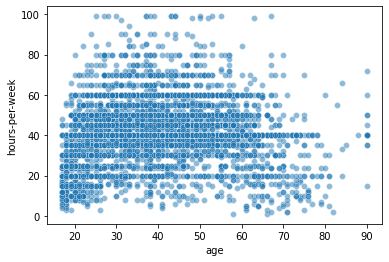

In [73]:
sea.scatterplot(data=p1_data, x='age', y='hours-per-week', alpha=0.5)

## Problem 3

<AxesSubplot:>

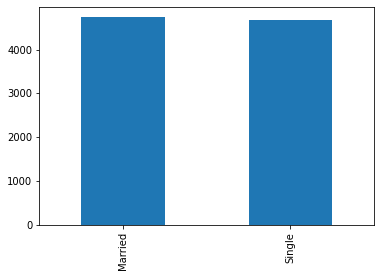

In [74]:
p1_data['marital-status'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='income', ylabel='count'>

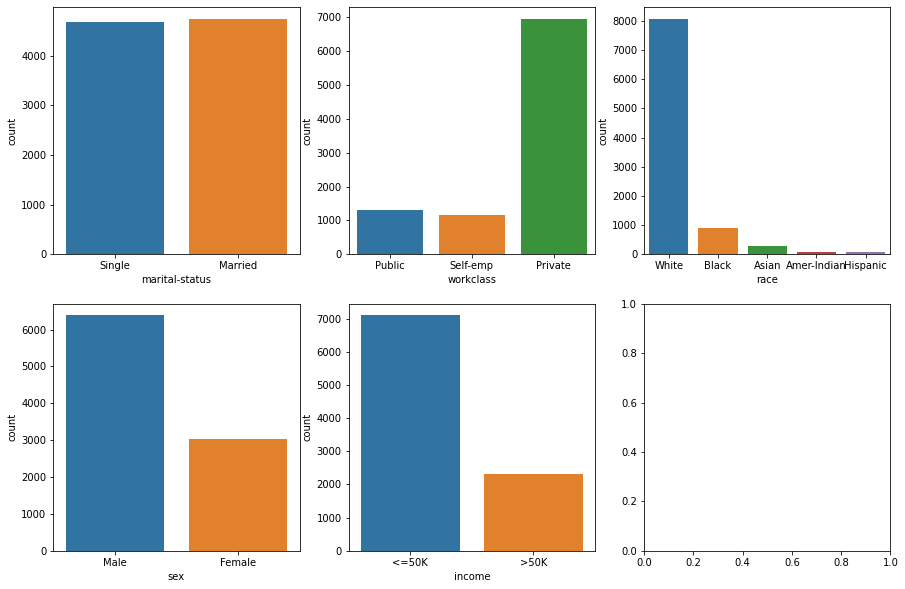

In [75]:
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(15,10))
sea.countplot(x='marital-status', data=p1_data, ax=axs[0,0])
sea.countplot(x='workclass', data=p1_data, ax=axs[0,1])
sea.countplot(x='race', data=p1_data, ax=axs[0,2])
sea.countplot(x='sex', data=p1_data, ax=axs[1,0])
sea.countplot(x='income', data=p1_data, ax=axs[1,1])

## Problem 4

In [76]:
multi_index = p1_data.set_index(['workclass', 'income'])

In [77]:
p1_data.groupby(['income','race'])['workclass'].count().unstack().fillna(0)

race,Amer-Indian,Asian,Black,Hispanic,White
income,,,,,
<=50K,83,224,773,69,5944
>50K,9,67,119,6,2118


In [78]:
p1_data.groupby(['income']).count().fillna(0)

,age,workclass,education,marital-status,race,sex,hours-per-week
income,,,,,,,
<=50K,7093,7093,7093,7093,7093,7093,7093
>50K,2319,2319,2319,2319,2319,2319,2319


In [79]:
p1_data.groupby(['race', 'income', 'workclass']).count().unstack()

age                 education                  \
workclass          Private Public Self-emp   Private Public Self-emp   
race        income                                                     
Amer-Indian <=50K       61     17        5        61     17        5   
            >50K         4      3        2         4      3        2   
Asian       <=50K      162     33       29       162     33       29   
            >50K        42     15       10        42     15       10   
Black       <=50K      598    154       21       598    154       21   
            >50K        66     38       15        66     38       15   
Hispanic    <=50K       62      4        3        62      4        3   
            >50K         2      1        3         2      1        3   
White       <=50K     4560    717      667      4560    717      667   
            >50K      1390    335      393      1390    335      393   

                   marital-status                     sex                  \
workclass                 Private Public Self-emp Private Public Self-emp   
race        income                                                          
Amer-Indian <=50K              61     17        5      61     17        5   
            >50K                4      3        2       4      3        2   
Asian       <=50K             162     33       29     162     33       29   
            >50K               42     15       10      42     15       10   
Black       <=50K             598    154       21     598    154       21   
            >50K               66     38       15      66     38       15   
Hispanic    <=50K              62      4        3      62      4        3   
            >50K                2      1        3       2      1        3   
White       <=50K            4560    717      667    4560    717      667   
            >50K             1390    335      393    1390    335      393   

                   hours-per-week                  
workclass                 Private Public Self-emp  
race        income                                 
Amer-Indian <=50K              61     17        5  
            >50K                4      3        2  
Asian       <=50K             162     33       29  
            >50K               42     15       10  
Black       <=50K             598    154       21  
            >50K               66     38       15  
Hispanic    <=50K              62      4        3  
            >50K                2      1        3  
White       <=50K            4560    717      667  
            >50K             1390    335      393

In [80]:
p1_data.groupby(['race', 'workclass'])['income'].count()

race         workclass
Amer-Indian  Private        65
             Public         20
             Self-emp        7
Asian        Private       204
             Public         48
             Self-emp       39
Black        Private       664
             Public        192
             Self-emp       36
Hispanic     Private        64
             Public          5
             Self-emp        6
White        Private      5950
             Public       1052
             Self-emp     1060
Name: income, dtype: int64

<AxesSubplot:xlabel='race', ylabel='count'>

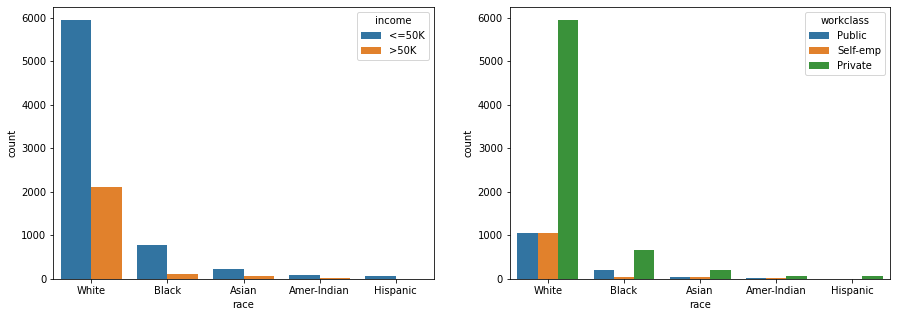

In [81]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))
sea.countplot(data=p1_data, x='race', hue='income', ax=axs[0])
sea.countplot(data=p1_data, x='race', hue='workclass', ax=axs[1])

<AxesSubplot:xlabel='income', ylabel='count'>

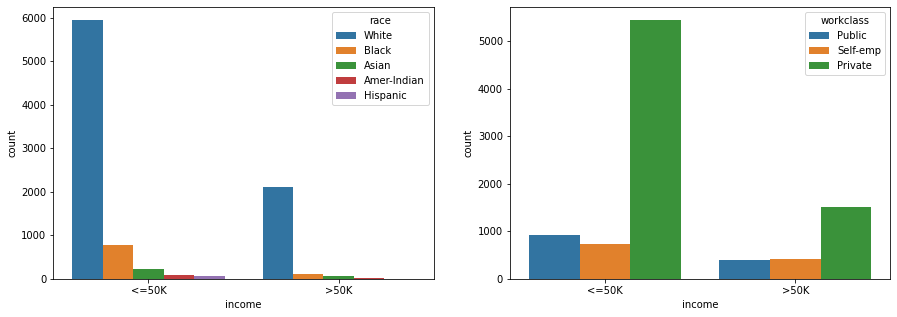

In [82]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))
sea.countplot(data=p1_data, x='income', hue='race', ax=axs[0])
sea.countplot(data=p1_data, x='income', hue='workclass', ax=axs[1])

## Problem 5


In [83]:
# change hours per week to categorical 
categorical_income = []
for hours in p1_data['hours-per-week']:
    if int(hours) < 35 :
        categorical_income.append('low')
    elif int(hours) > 34 and int(hours) < 45:
        categorical_income.append('normal')
    else:
        categorical_income.append('high')
        
# Change education to categorical
categorical_education = []
for grade in p1_data['education']:
    if int(grade) < 12:
        categorical_education.append('no_diploma')
    elif int(grade) == 12:
        categorical_education.append('diploma')
    elif int(grade) > 12 and int(grade) < 15:
        categorical_education.append('some_college')
    else:
        categorical_education.append('college')

In [84]:
p5_data = p1_data.copy()
p5_data['hours-per-week'] = categorical_income
p5_data['education'] = categorical_education

In [85]:
low_income = p5_data[p5_data['income'] =='<=50K']
low_income_non_white = low_income[low_income['race'] != 'White']
high_income = p5_data[p5_data['income'] == '>50K']
high_income_non_white = high_income[high_income['race'] != 'White']

[Text(0.5, 1.0, 'High Income')]

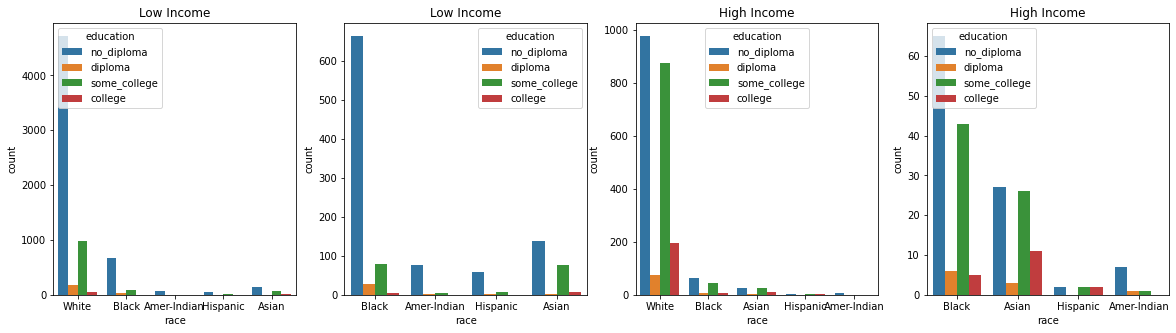

In [86]:
fig, axs = plt.subplots(ncols=4, figsize=(20, 5))
education_order = ['no_diploma', 'diploma', 'some_college', 'college']
sea.countplot(data=low_income, x='race', hue='education', hue_order=education_order, ax=axs[0]).set( title='Low Income')
sea.countplot(data=low_income_non_white, x='race', hue='education', hue_order=education_order, ax=axs[1]).set(title='Low Income')
sea.countplot(data=high_income, x='race', hue='education', hue_order=education_order, ax=axs[2]).set(title='High Income')
sea.countplot(data=high_income_non_white, x='race', hue='education', hue_order=education_order, ax=axs[3]).set(title='High Income')

### Thoughts

- It is interesting to see that the proportions between education level is the same for all races. Meaning, regardless of income or race, each race has a majority of people with no diploma.

[Text(0.5, 1.0, 'high income ex White')]

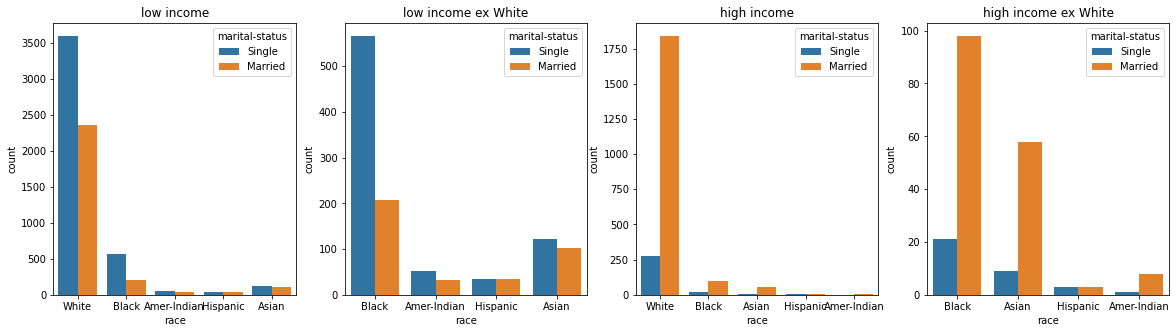

In [87]:
marital_order = ['Single', 'Married']
fig, axs = plt.subplots(ncols=4, figsize=(20, 5))
sea.countplot(data=low_income, x='race', hue='marital-status', ax=axs[0], hue_order=marital_order).set(title='low income')
sea.countplot(data=low_income_non_white, x='race', hue='marital-status', ax=axs[1], hue_order=marital_order).set(title='low income ex White')
sea.countplot(data=high_income, x='race', hue='marital-status', ax=axs[2], hue_order=marital_order).set(title='high income')
sea.countplot(data=high_income_non_white, x='race', hue='marital-status', ax=axs[3], hue_order=marital_order).set(title='high income ex White')

In [88]:
low_income.groupby(['race', 'marital-status']).count()

age  workclass  education   sex  hours-per-week  \
race        marital-status                                                     
Amer-Indian Married           32         32         32    32              32   
            Single            51         51         51    51              51   
Asian       Married          103        103        103   103             103   
            Single           121        121        121   121             121   
Black       Married          207        207        207   207             207   
            Single           566        566        566   566             566   
Hispanic    Married           35         35         35    35              35   
            Single            34         34         34    34              34   
White       Married         2353       2353       2353  2353            2353   
            Single          3591       3591       3591  3591            3591   

                            income  
race        marital-status          
Amer-Indian Married             32  
            Single              51  
Asian       Married            103  
            Single             121  
Black       Married            207  
            Single             566  
Hispanic    Married             35  
            Single              34  
White       Married           2353  
            Single            3591

In [89]:
high_income.groupby(['race', 'marital-status']).count()

age  workclass  education   sex  hours-per-week  \
race        marital-status                                                     
Amer-Indian Married            8          8          8     8               8   
            Single             1          1          1     1               1   
Asian       Married           58         58         58    58              58   
            Single             9          9          9     9               9   
Black       Married           98         98         98    98              98   
            Single            21         21         21    21              21   
Hispanic    Married            3          3          3     3               3   
            Single             3          3          3     3               3   
White       Married         1840       1840       1840  1840            1840   
            Single           278        278        278   278             278   

                            income  
race        marital-status          
Amer-Indian Married              8  
            Single               1  
Asian       Married             58  
            Single               9  
Black       Married             98  
            Single              21  
Hispanic    Married              3  
            Single               3  
White       Married           1840  
            Single             278

### Observations

- If you are black or white and low income, it is more likely that you are single. However with and Hispanics, the distribution of marital status is unaffected by income level.

In [90]:
print(low_income.columns)
print(low_income['hours-per-week'].value_counts())

Index(['age', 'workclass', 'education', 'marital-status', 'race', 'sex',
       'hours-per-week', 'income'],
      dtype='object')
normal    4118
high      1634
low       1341
Name: hours-per-week, dtype: int64


[Text(0.5, 1.0, 'high income ex White')]

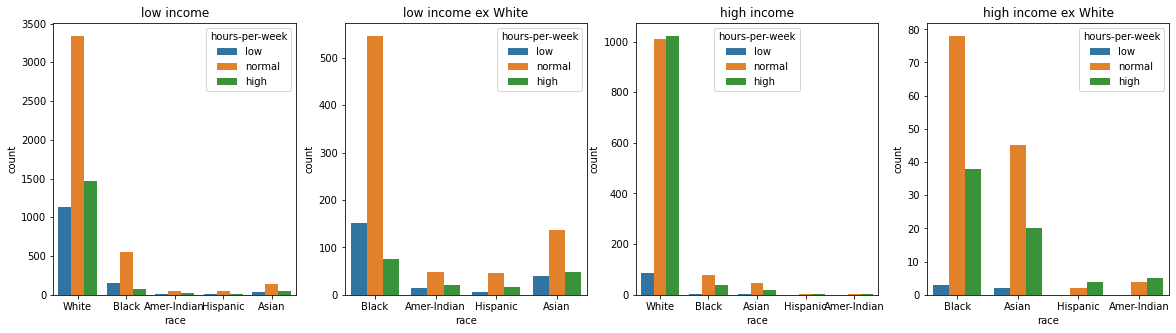

In [91]:
worked_hours = ['low', 'normal', 'high']
fig, axs = plt.subplots(ncols=4, figsize=(20, 5))
sea.countplot(data=low_income, x='race', hue='hours-per-week', ax=axs[0], hue_order=worked_hours).set(title='low income')
sea.countplot(data=low_income_non_white, x='race', hue='hours-per-week', ax=axs[1], hue_order=worked_hours).set(title='low income ex White')
sea.countplot(data=high_income, x='race', hue='hours-per-week', ax=axs[2], hue_order=worked_hours).set(title='high income')
sea.countplot(data=high_income_non_white, x='race', hue='hours-per-week', ax=axs[3], hue_order=worked_hours).set(title='high income ex White')

## Observations

- If you are low income, you are more likely to work a normal number of hours than not.
- For high income:
    - If you are white you are as likely to work a high number of hours as normal
    - if you are black or asian, you are more likely to work normal number of others
    - if you are hispanic or native, you are more likely to work a high number of hours

# Problem 6

In [92]:
p1_data.head()

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39,Public,13,Single,White,Male,40,<=50K
1,50,Self-emp,13,Married,White,Male,13,<=50K
2,38,Private,9,Single,White,Male,40,<=50K
3,53,Private,7,Married,Black,Male,40,<=50K
4,28,Private,13,Married,Black,Female,40,<=50K


In [93]:
adult_numeric = pd.get_dummies(p1_data)
adult_numeric.head(n=10)

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male,income_<=50K,income_>50K
0,39,13,40,0,1,0,0,1,0,0,0,0,1,0,1,1,0
1,50,13,13,0,0,1,1,0,0,0,0,0,1,0,1,1,0
2,38,9,40,1,0,0,0,1,0,0,0,0,1,0,1,1,0
3,53,7,40,1,0,0,1,0,0,0,1,0,0,0,1,1,0
4,28,13,40,1,0,0,1,0,0,0,1,0,0,1,0,1,0
5,37,14,40,1,0,0,1,0,0,0,0,0,1,1,0,1,0
6,49,5,16,1,0,0,1,0,0,0,1,0,0,1,0,1,0
7,52,9,45,0,0,1,1,0,0,0,0,0,1,0,1,0,1
8,31,14,50,1,0,0,0,1,0,0,0,0,1,1,0,0,1
9,42,13,40,1,0,0,1,0,0,0,0,0,1,0,1,0,1


In [94]:
adult_numeric.to_csv('adult_numeric.csv')

## Problem 7

In [95]:
# defaults to pearson
adult_numeric.corr()

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male,income_<=50K,income_>50K
age,1.000000,0.034733,0.103170,-0.202982,0.080254,0.187633,0.381168,-0.381168,-0.010904,-0.008097,-0.008668,-0.031973,0.022413,-0.071804,0.071804,-0.232261,0.232261
education,0.034733,1.000000,0.141730,-0.154977,0.154462,0.044472,0.050627,-0.050627,-0.039308,0.057360,-0.069029,-0.044845,0.051765,-0.008180,0.008180,-0.329066,0.329066
hours-per-week,0.103170,0.141730,1.000000,-0.097753,-0.021407,0.154025,0.183944,-0.183944,0.002964,0.000550,-0.071442,0.011964,0.055561,-0.221588,0.221588,-0.222686,0.222686
workclass_Private,-0.202982,-0.154977,-0.097753,1.000000,-0.677134,-0.625700,-0.121014,0.121014,-0.007136,-0.015060,0.004632,0.023490,-0.000389,0.072569,-0.072569,0.116453,-0.116453
workclass_Public,0.080254,0.154462,-0.021407,-0.677134,1.000000,-0.150335,-0.002351,0.002351,0.022185,0.012883,0.070250,-0.018927,-0.066491,0.045338,-0.045338,-0.047981,0.047981
workclass_Self-emp,0.187633,0.044472,0.154025,-0.625700,-0.150335,1.000000,0.165075,-0.165075,-0.013931,0.006576,-0.080694,-0.011495,0.071008,-0.145559,0.145559,-0.105593,0.105593
marital-status_Married,0.381168,0.050627,0.183944,-0.121014,-0.002351,0.165075,1.000000,-1.000000,-0.013614,0.017852,-0.104427,0.000605,0.082114,-0.357736,0.357736,-0.414173,0.414173
marital-status_Single,-0.381168,-0.050627,-0.183944,0.121014,0.002351,-0.165075,-1.000000,1.000000,0.013614,-0.017852,0.104427,-0.000605,-0.082114,0.357736,-0.357736,0.414173,-0.414173
race_Amer-Indian,-0.010904,-0.039308,0.002964,-0.007136,0.022185,-0.013931,-0.013614,0.013614,1.000000,-0.017746,-0.032148,-0.008905,-0.242795,0.021711,-0.021711,0.034254,-0.034254
race_Asian,-0.008097,0.057360,0.000550,-0.015060,0.012883,0.006576,0.017852,-0.017852,-0.017746,1.000000,-0.057795,-0.016009,-0.436496,0.001773,-0.001773,0.006693,-0.006693


In [96]:
# Spearman correlation is best suited for categorical data
adult_numeric.corr(method='spearman')

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male,income_<=50K,income_>50K
age,1.000000,0.055347,0.147986,-0.211089,0.093251,0.184748,0.398136,-0.398136,-0.008311,-0.008809,-0.005379,-0.032061,0.019311,-0.080453,0.080453,-0.269109,0.269109
education,0.055347,1.000000,0.154041,-0.153227,0.155734,0.040773,0.050605,-0.050605,-0.037887,0.060958,-0.079029,-0.038284,0.056281,-0.006986,0.006986,-0.319175,0.319175
hours-per-week,0.147986,0.154041,1.000000,-0.086606,-0.029719,0.147861,0.201789,-0.201789,-0.000169,-0.009394,-0.098577,0.006970,0.085292,-0.255624,0.255624,-0.257583,0.257583
workclass_Private,-0.211089,-0.153227,-0.086606,1.000000,-0.677134,-0.625700,-0.121014,0.121014,-0.007136,-0.015060,0.004632,0.023490,-0.000389,0.072569,-0.072569,0.116453,-0.116453
workclass_Public,0.093251,0.155734,-0.029719,-0.677134,1.000000,-0.150335,-0.002351,0.002351,0.022185,0.012883,0.070250,-0.018927,-0.066491,0.045338,-0.045338,-0.047981,0.047981
workclass_Self-emp,0.184748,0.040773,0.147861,-0.625700,-0.150335,1.000000,0.165075,-0.165075,-0.013931,0.006576,-0.080694,-0.011495,0.071008,-0.145559,0.145559,-0.105593,0.105593
marital-status_Married,0.398136,0.050605,0.201789,-0.121014,-0.002351,0.165075,1.000000,-1.000000,-0.013614,0.017852,-0.104427,0.000605,0.082114,-0.357736,0.357736,-0.414173,0.414173
marital-status_Single,-0.398136,-0.050605,-0.201789,0.121014,0.002351,-0.165075,-1.000000,1.000000,0.013614,-0.017852,0.104427,-0.000605,-0.082114,0.357736,-0.357736,0.414173,-0.414173
race_Amer-Indian,-0.008311,-0.037887,-0.000169,-0.007136,0.022185,-0.013931,-0.013614,0.013614,1.000000,-0.017746,-0.032148,-0.008905,-0.242795,0.021711,-0.021711,0.034254,-0.034254
race_Asian,-0.008809,0.060958,-0.009394,-0.015060,0.012883,0.006576,0.017852,-0.017852,-0.017746,1.000000,-0.057795,-0.016009,-0.436496,0.001773,-0.001773,0.006693,-0.006693


In [97]:
corr_data = adult_numeric.corr()
corr_data['education'].sort_values(ascending=False)

education                 1.000000
income_>50K               0.329066
workclass_Public          0.154462
hours-per-week            0.141730
race_Asian                0.057360
race_White                0.051765
marital-status_Married    0.050627
workclass_Self-emp        0.044472
age                       0.034733
sex_Male                  0.008180
sex_Female               -0.008180
race_Amer-Indian         -0.039308
race_Hispanic            -0.044845
marital-status_Single    -0.050627
race_Black               -0.069029
workclass_Private        -0.154977
income_<=50K             -0.329066
Name: education, dtype: float64

### Observations
- Income has the strongest correlation with education.  It is interesting to observe that income levels are at opposite ends of the correlation spectrum.
- Second most impactfull variable is workclass, followed by race. 

In [98]:
corr_data['income_<=50K'].sort_values(ascending=False)

income_<=50K              1.000000
marital-status_Single     0.414173
sex_Female                0.203886
workclass_Private         0.116453
race_Black                0.084836
race_Hispanic             0.034607
race_Amer-Indian          0.034254
race_Asian                0.006693
workclass_Public         -0.047981
race_White               -0.092589
workclass_Self-emp       -0.105593
sex_Male                 -0.203886
hours-per-week           -0.222686
age                      -0.232261
education                -0.329066
marital-status_Married   -0.414173
income_>50K              -1.000000
Name: income_<=50K, dtype: float64

### Observations

- Marital status has the strongest relationship with low income.  Most likely due to the age at which people marry.
- Suprisingly gender plays a role if you are a woman. 
- Being white has no impact on your income being below 50k but this is not the case with black or hispanic.

# Problem 8

In [99]:
max(p1_data['age'])

90

In [100]:
categorical_age = []
for age in p1_data['age']:
    if age < 40 :
        categorical_age.append('young')
    elif age < 60:
        categorical_age.append('mid_age')
    else:
        categorical_age.append('old')


In [101]:
age_df = pd.DataFrame(zip(p1_data['age'], categorical_age), columns=['age', 'group'])
age_df.head(n=10)

,age,group
0,39,young
1,50,mid_age
2,38,young
3,53,mid_age
4,28,young
5,37,young
6,49,mid_age
7,52,mid_age
8,31,young
9,42,mid_age


# Problem 9

In [102]:
# Hours per week
min_max = lambda x: (x - min(p1_data['hours-per-week'])) / ( max(p1_data['hours-per-week']) - min(p1_data['hours-per-week']))
hours_per_week = min_max(p1_data['hours-per-week'])

In [103]:
z_score_func = lambda x: (x - x.mean() ) / ( x.std())
age = z_score_func(p1_data['age'])
z_hours_per_week = z_score_func(p1_data['hours-per-week'])
z_education = z_score_func(p1_data['education'])

### Via one dataframe

In [104]:
z_scores = p1_data[['age', 'hours-per-week', 'education']]

In [105]:
z_scores = z_score_func(z_scores)
z_scores.head()

,age,hours-per-week,education
0,0.049582,-0.090892,1.130842
1,0.898208,-2.362742,1.130842
2,-0.027566,-0.090892,-0.442649
3,1.129651,-0.090892,-1.229394
4,-0.799044,-0.090892,1.130842


In [106]:
all_hours = {'original': p1_data['hours-per-week'], 'max_min': hours_per_week, 'zscore':z_hours_per_week}

In [107]:
pd.DataFrame(all_hours)

,original,max_min,zscore
0,40,0.397959,-0.090892
1,13,0.122449,-2.362742
2,40,0.397959,-0.090892
3,40,0.397959,-0.090892
4,40,0.397959,-0.090892
...,...,...,...
9407,60,0.602041,1.591959
9408,8,0.071429,-2.783455
9409,40,0.397959,-0.090892
9410,53,0.530612,1.002961


# Problem 10

Now download a modified version of the data  (adult-modified-missing-vals.csv) that contains missing values. 

In [108]:
p10_data = pd.read_csv('adult-modified-missing-vals.csv')
p10_data.head()

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39,Public,13,Single,White,Male,40,<=50K
1,50,Self-emp,13,Married,White,Male,13,<=50K
2,38,Private,9,Single,White,Male,40,<=50K
3,53,Private,7,Married,Black,Male,40,<=50K
4,28,Private,13,Married,Black,Female,40,<=50K


(a) Using Pandas determine all the attributes with missing values and the number of missing values for each such attribute.

In [109]:
p10_data.isna().sum()

age               0
workclass         0
education         0
marital-status    0
race              0
sex               0
hours-per-week    0
income            0
dtype: int64

In [110]:
p10_data.value_counts()

age  workclass  education  marital-status  race   sex     hours-per-week  income
24   Private    9          Single          White  Male    40              <=50K     18
21   Private    9          Single          White  Male    40              <=50K     16
23   Private    9          Single          White  Female  40              <=50K     15
34   Private    9          Married         White  Male    40              <=50K     14
22   Private    9          Single          White  Male    40              <=50K     14
                                                                                    ..
34   Private    11         Single          Black  Male    40              <=50K      1
                           Married         White  Male    50              <=50K      1
                                                          40              >50K       1
                                                          32              >50K       1
?    Self-emp   16         Married         White 

In [111]:
p10_data.replace('?', np.nan).isna().sum()

age               198
workclass         588
education           0
marital-status      0
race                0
sex                 0
hours-per-week      0
income              0
dtype: int64

In [112]:
p10_data.replace('?', np.nan, inplace=True)
p10_data.isna().sum()

age               198
workclass         588
education           0
marital-status      0
race                0
sex                 0
hours-per-week      0
income              0
dtype: int64

(b) Show all the instances in the data that contain a missing value.

In [113]:
p10_data[p10_data.isnull().any(axis=1)]

,age,workclass,education,marital-status,race,sex,hours-per-week,income
19,NaN,Self-emp,14,Single,White,Female,45,>50K
27,NaN,NaN,10,Married,Asian,Male,60,>50K
40,NaN,Private,5,Married,White,Male,43,<=50K
61,32,NaN,4,Married,White,Male,40,<=50K
65,NaN,Private,9,Married,White,Male,40,<=50K
...,...,...,...,...,...,...,...,...
9965,NaN,Private,10,Married,Amer-Indian,Female,40,<=50K
9966,NaN,Private,13,Married,White,Male,50,>50K
9987,67,NaN,4,Married,White,Male,40,<=50K
9993,NaN,Private,9,Married,White,Female,15,<=50K


 (c) Fill the missing values for all numeric attributes using the mean value for the attribute.

In [114]:
age_mean = p1_data['age'].mean()
education_mean = p1_data['education'].mean()
hours_mean = p1_data['hours-per-week'].mean()

In [115]:
p10_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             9802 non-null   object
 1   workclass       9412 non-null   object
 2   education       10000 non-null  int64 
 3   marital-status  10000 non-null  object
 4   race            10000 non-null  object
 5   sex             10000 non-null  object
 6   hours-per-week  10000 non-null  int64 
 7   income          10000 non-null  object
dtypes: int64(2), object(6)
memory usage: 625.1+ KB


In [116]:
p10_age = []
for age in p10_data['age'].values:
    try:
        p10_age.append(int(age))
    except:
        p10_age.append(age_mean)
    
p10_education = []
for grade in p10_data['education'].values:
    if grade == np.nan:
        p10_education.append(education_mean)
    else:
        p10_education.append(grade)
        
p10_hours = []
for hours in p10_data['hours-per-week'].values:
    try:
        p10_hours.append(int(hours))
    except:
        p10_hours.append(hours_mean)
    

Here we replace the series with the seires using the mean values where appropriate.

In [117]:
p10_data['age'] = p10_age
p10_data['education'] = p10_education
p10_data['hours-per-week'] = p10_hours

 (d) After filling in the missing numeric values, drop all rows where a categorical attribute contains a missing value.

In [118]:
p10_data.dropna(inplace=True)

 (e) Show that the final resulting table does not contain missing values.

In [119]:
p10_data.head()

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39.0,Public,13,Single,White,Male,40,<=50K
1,50.0,Self-emp,13,Married,White,Male,13,<=50K
2,38.0,Private,9,Single,White,Male,40,<=50K
3,53.0,Private,7,Married,Black,Male,40,<=50K
4,28.0,Private,13,Married,Black,Female,40,<=50K


In [120]:
p10_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9412 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             9412 non-null   float64
 1   workclass       9412 non-null   object 
 2   education       9412 non-null   int64  
 3   marital-status  9412 non-null   object 
 4   race            9412 non-null   object 
 5   sex             9412 non-null   object 
 6   hours-per-week  9412 non-null   int64  
 7   income          9412 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 661.8+ KB


In [121]:
p10_data.isna().sum()

age               0
workclass         0
education         0
marital-status    0
race              0
sex               0
hours-per-week    0
income            0
dtype: int64

As you can see from the above line, there are no more missing values in the data.

In [122]:
p10_data.isnull().sum()

age               0
workclass         0
education         0
marital-status    0
race              0
sex               0
hours-per-week    0
income            0
dtype: int64